In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [64]:
keywords = pd.read_csv('keyword_df.csv')
imdb= pd.read_csv('imdbrough.csv')

In [65]:
roi = pd.read_csv('roiimdb.csv')

In [66]:
roi = roi.set_index('imdbcode')
keywords = keywords.set_index('imdbcode')

In [67]:
#codeblock to recreate lists
terms = keywords.keywords.apply(lambda x : x.split(','))
keywords['isolatedterms'] = [[word.strip("[").lstrip(" '").rstrip("'").strip("]") for word in words] for words in terms] 

In [68]:
#creating plotterms dictionary
allterms = [item for group in keywords.isolatedterms for item in group]
uniqueterms = list(set(allterms))
termscounts = zip(uniqueterms, [allterms.count(term) for term in uniqueterms])
orderedcounts = sorted(termscounts,key = lambda x: x[1], reverse = True)
plotdict={}
for term, count in orderedcounts:
    imdbkeys=list(keywords[keywords.isolatedterms.map(lambda x: term in x)==True].index)
    plotdict[term] = [count, imdbkeys, [roi.loc[key, 'movie'] for key in imdbkeys]]

In [69]:
plotdf = pd.DataFrame.from_dict(plotdict, orient='index')

In [75]:
plotdf.columns = ['movie_count','imdbkeys', 'movie_titles']

In [76]:
#code creating plotdf['domroi_average']
domroi_averages=[]
domroilist=[]
medianlist=[]

for plot in plotdf.index:
    junk = [roi.loc[key, 'dom_roi'] for key in plotdf.loc[plot,'imdbkeys']]
    average = sum(junk)/len(junk)
    domroi_averages.append(average)
    domroilist.append(junk)
    median_roi.append(junk[len(junk)//2])
    
plotdf['average_domroi']=domroi_averages
plotdf['domroilist']=domroilist


In [77]:
#code cleaning colums
plotdf.average_domroi = plotdf.average_domroi.apply(lambda x: x if isinstance(x, float) else None)
plotdf.domroilist= plotdf.domroilist.apply(lambda x: [number for number in x if isinstance(number, float)])

In [78]:
#code creating plotdf['average_worldroi'] 
worldroi_averages=[]
worldroilist=[]

for plot in plotdf.index:
    junk = [roi.loc[key, 'world_roi'] for key in plotdf.loc[plot,'imdbkeys']]
    average = sum(junk)/len(junk)
    worldroi_averages.append(average)
    worldroilist.append(junk)
plotdf['average_worldroi']=worldroi_averages
plotdf['worldroilist'] = worldroilist


In [79]:
#Datacleaning
plotdf.average_worldroi=plotdf.average_worldroi.apply(lambda x: x if isinstance(x, float) else None)
plotdf.worldroilist= plotdf.worldroilist.apply(lambda x: [number for number in x if isinstance(number, float)])


In [84]:
plotdf[plotdf['movie_count']>15].sort_values(by='average_domroi', ascending=False).head(20)

,movie_count,imdbkeys,movie_titles,average_domroi,domroilist,average_worldroi,worldroilist
high school,26,"[tt0087985, tt1489889, tt4877122, tt1648179, t...","[Red Dawn, Central Intelligence, The Emoji Mov...",9.467879,"[-0.3106648769230769, 1.54881742, 0.72179026, ...",17.566649,"[-0.2590130769230769, 3.3438961000000003, 3.33..."
ghost,16,"[tt1790809, tt0087332, tt1623288, tt2554274, t...",[Pirates of the Caribbean: Dead Men Tell No Ta...,4.527411,"[-0.2497440173913044, -0.10867656944444444, -0...",9.777607,"[2.4271353782608696, 0.5903379027777778, 0.801..."
pregnancy,18,"[tt1586265, tt1473832, tt0453562, tt5109784, t...","[What to Expect When You're Expecting, Bridget...",3.152109,"[0.09739208, -0.3102912857142857, 2.0651681612...",6.604797,"[1.3592804266666667, 4.8806482285714266, 2.144..."
supernatural power,26,"[tt0848228, tt1877832, tt4154664, tt2294629, t...","[The Avengers, X-Men: Days of Future Past, Cap...",2.653311,"[1.77013132, 0.16960767, 1.4372911542857143, 1...",7.561847,"[5.7463817644444415, 2.739313875, 5.4174945714..."
survival,17,"[tt5013056, tt0481499, tt1663202, tt1390411, t...","[Dunkirk, The Croods, The Revenant, In the Hea...",2.400459,"[0.26712186666666665, 0.3864327777777778, 0.36...",5.967885,"[2.33224912, 3.2449512962962963, 2.94769112592..."
brother sister relationship,18,"[tt1446192, tt1840309, tt1389137, tt1366344, t...","[Rise of the Guardians, Divergent, We Bought a...",2.336014,"[-0.2868085655172414, 0.7758575882352942, 0.51...",5.107520,"[1.1165579448275862, 2.247234882352941, 1.3745..."
teenage girl,19,"[tt4624424, tt0087985, tt5580266, tt0082329, t...","[Storks, Red Dawn, The Hate U Give, Endless Lo...",2.221526,"[0.0382754, -0.3106648769230769, 0.29215143478...",5.002348,"[1.6193347285714286, -0.2590130769230769, 0.52..."
female protagonist,46,"[tt2277860, tt1217209, tt2948356, tt1951264, t...","[Finding Dory, Brave, Zootopia, The Hunger Gam...",2.060593,"[1.431477805, 0.2826063891891892, 1.2751216533...",5.759255,"[4.106075965, 1.997873145945946, 5.79619744, 5..."
friendship,40,"[tt3040964, tt2245084, tt2224026, tt1679335, t...","[The Jungle Book, Big Hero 6, Home, Trolls, Th...",2.002320,"[1.0800064171428572, 0.34865350303030296, 0.36...",4.160764,"[4.502025982857143, 2.952289866666667, 1.96921..."
mother son relationship,30,"[tt3874544, tt4302938, tt1086772, tt1462769, t...","[The Boss Baby, Kubo and the Two Strings, Blen...",1.579479,"[0.40002426399999996, -0.12685294545454545, 0....",3.865671,"[3.0870300960000003, 0.4099658545454545, 1.844..."


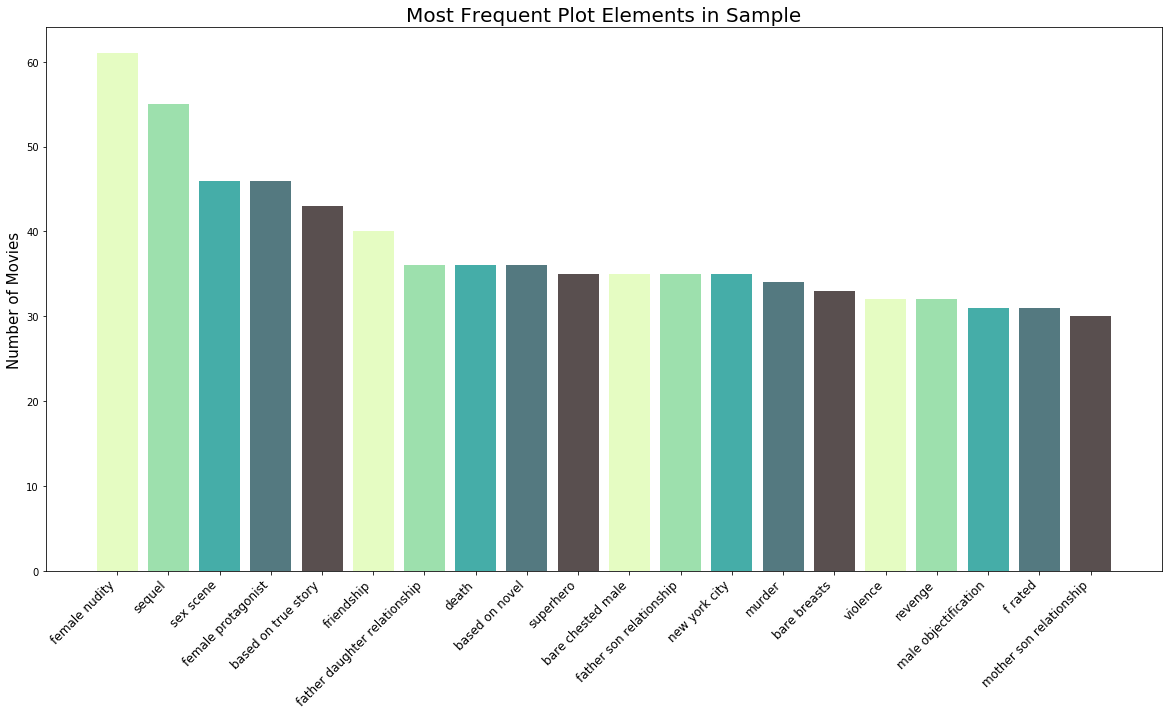

In [230]:
#Representing Most Frequent Plot Elements to Appear in Sample
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(plotdf.index[:20], plotdf.movie_count[:20], color=['#E5FCC2', '#9DE0AD', '#45ADA8', '#547980', '#594F4F'])
ax.set_xticklabels(labels=plotdf.index[:20], rotation='45', ha='right', fontsize=12)
ax.set_ylabel('Number of Movies', fontsize=15)
ax.set_title('Most Frequent Plot Elements in Sample', fontsize=20)
plt.savefig('plot_mostfrequent.png')

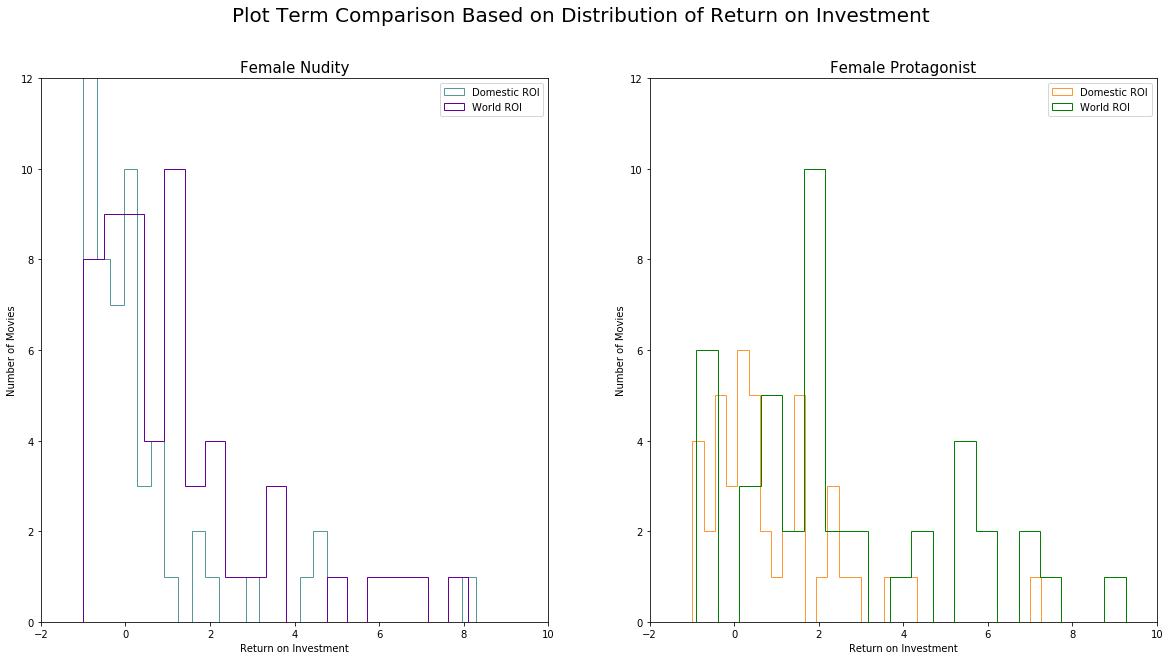

In [227]:
#Brief Study Comparing Distribution of Two Plot Elements 
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].hist(plotdf.loc['female nudity', 'domroilist'], bins=50, color='#569999', label='Domestic ROI', histtype='step')
axs[0].hist(plotdf.loc['female nudity', 'worldroilist'], bins=50, color='#650099', label='World ROI', histtype='step')
axs[0].legend()
axs[0].set_xlim(-2,10)
axs[0].set_ylim(0,12)
axs[0].set_ylabel('Number of Movies')
axs[0].set_xlabel('Return on Investment')
axs[0].set_title('Female Nudity', fontsize=15)
axs[1].hist(plotdf.loc['female protagonist', 'domroilist'], bins=200, color='#FF9833', label='Domestic ROI', histtype='step')
axs[1].hist(plotdf.loc['female protagonist', 'worldroilist'], bins=200, color='green', label='World ROI',  histtype='step')
axs[1].set_ylabel('Number of Movies')
axs[1].set_xlabel('Return on Investment')
axs[1].legend()
axs[1].set_xlim(-2,10)
axs[1].set_ylim(0,12)
axs[1].set_title('Female Protagonist', fontsize=15)
fig.suptitle('Plot Term Comparison Based on Distribution of Return on Investment', fontsize= 20)
plt.savefig('plot_femalecomparison.png')

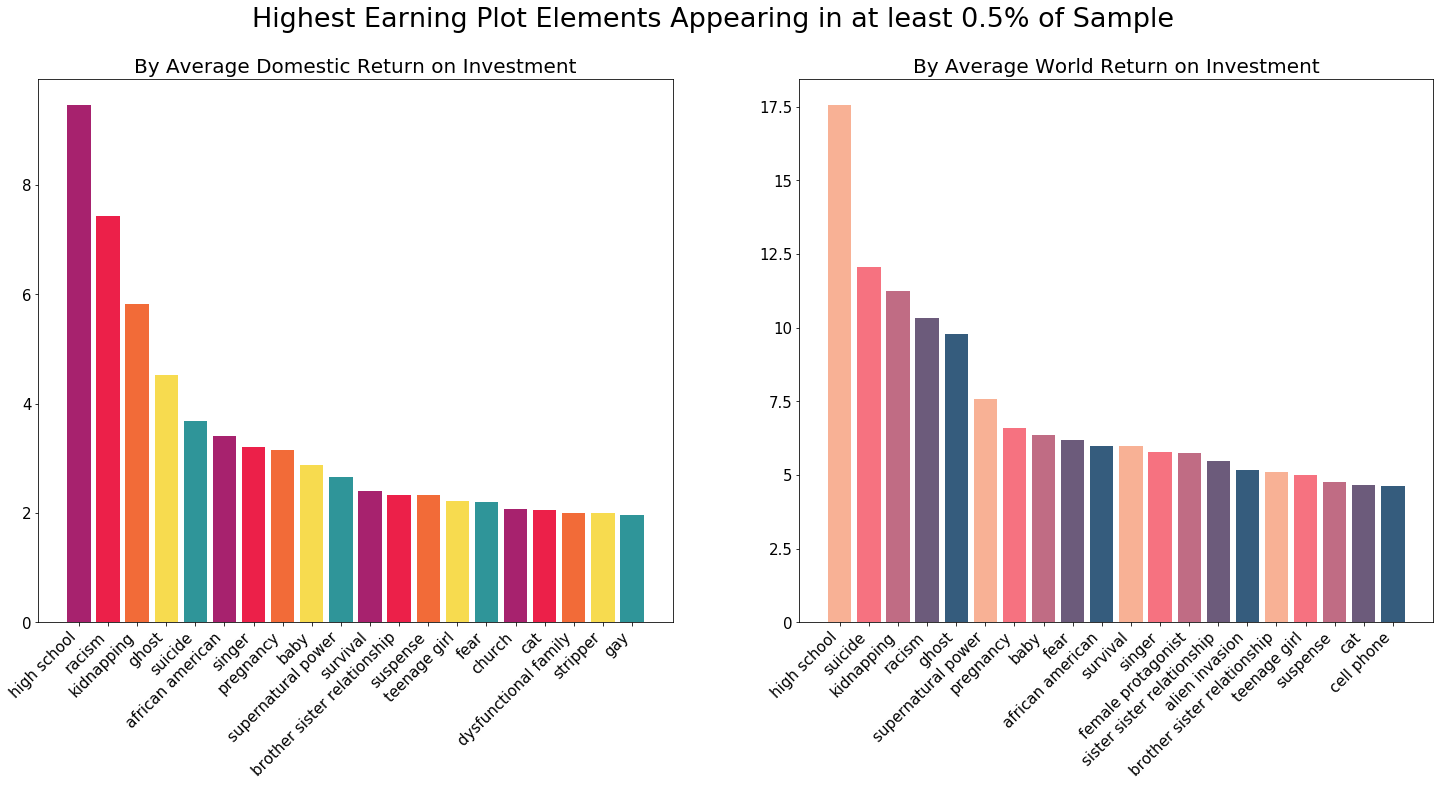

In [226]:
#Finding less frequent plottropes that could be profitable for the platform
#Terms with Highest Average Domestic Return on Interest
dom_index = plotdf[(plotdf.movie_count>10)&(plotdf.movie_count<30)].sort_values(by= 'average_domroi', ascending=False).index[:20]
#Terms with Highest Average World Return on Interest
world_index= plotdf[(plotdf.movie_count>10)].sort_values(by= 'average_worldroi', ascending=False).index[:20]

fig, axs = plt.subplots(1, 2, figsize=(25,10))
axs[0].bar(dom_index, plotdf[plotdf.movie_count>10].average_domroi.sort_values( ascending=False)[:20], color=['#A7226E', '#EC2049', '#F26B38', '#F7DB4F', '#2F9599'] )
axs[0].set_xticklabels(labels=dom_index, rotation=45, ha='right', fontsize=15)
axs[0].set_yticklabels([0,2,4,6,8], fontsize=15)
axs[0].set_title('By Average Domestic Return on Investment', fontsize=20)
axs[1].bar(world_index, plotdf[plotdf.movie_count>10].average_worldroi.sort_values(ascending=False)[:20], color=['#F8B195', '#F67280', '#C06C84', '#6C5B7B', '#355C7D'] )
axs[1].set_xticklabels(labels=world_index, rotation=45, ha='right', fontsize=15)
axs[1].set_yticklabels(labels=[0,2.5,5,7.5,10,12.5, 15, 17.5], fontsize=15)
axs[1].set_title('By Average World Return on Investment', fontsize=20)
fig.suptitle('Highest Earning Plot Elements Appearing in at least 0.5% of Sample', fontsize=27)
plt.savefig('plot_highestearners.png')